In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub

In [82]:
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
IMG_PATH = "../data/input/tmp2.jpg"

In [67]:
model = hub.load(SAVED_MODEL_PATH)

In [61]:
img = cv2.imread("../data/extracted_frames/GOPR0318.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [62]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [63]:
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [101]:
img = preprocess_image(IMG_PATH)

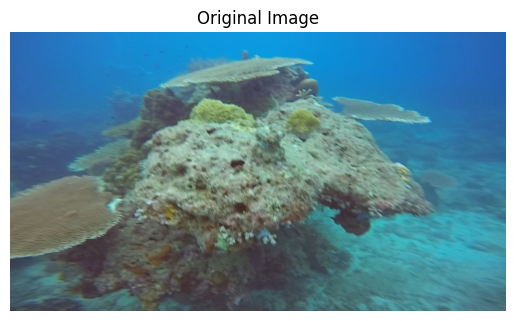

In [102]:
plot_image(tf.squeeze(img), title="Original Image")

In [103]:
fake_image = model(img)

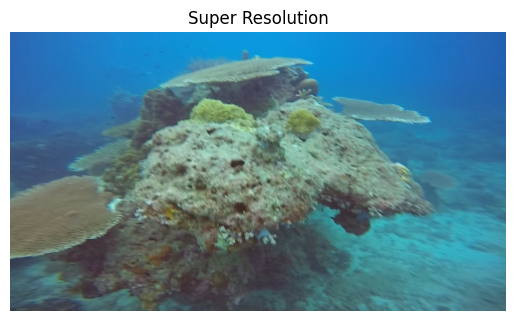

In [104]:
plot_image(tf.squeeze(fake_image), title="Super Resolution")

In [41]:
from tensorflow import keras

# Load the model
model = keras.models.load_model('../models/generator.h5')

# # Define arbitrary spatial dims, and 3 channels.
# inputs = keras.Input((3000, 4000, 3))

# # Trace out the graph using the input:
# outputs = model(inputs)

# # Override the model:
# model = keras.models.Model(inputs, outputs)

In [12]:
image_path = "../data/extracted_frames/GOPR0318.jpg"

low_res = cv2.imread(image_path, 1)
low_res = cv2.cvtColor(low_res, cv2.COLOR_BGR2RGB)
low_res = low_res / 255.0
tmp = np.expand_dims(low_res, axis=0)
tmp.shape

(1, 3000, 4000, 3)

In [13]:
model.predict(tmp)

ValueError: in user code:

    File "d:\OneDrive\School\SMU\Modules\CS604_DL_for_Visual_Recognition\Project\diving-autotrim\venv\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "d:\OneDrive\School\SMU\Modules\CS604_DL_for_Visual_Recognition\Project\diving-autotrim\venv\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\OneDrive\School\SMU\Modules\CS604_DL_for_Visual_Recognition\Project\diving-autotrim\venv\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "d:\OneDrive\School\SMU\Modules\CS604_DL_for_Visual_Recognition\Project\diving-autotrim\venv\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "d:\OneDrive\School\SMU\Modules\CS604_DL_for_Visual_Recognition\Project\diving-autotrim\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\OneDrive\School\SMU\Modules\CS604_DL_for_Visual_Recognition\Project\diving-autotrim\venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model_1" "                 f"(type Functional).
    
    Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 96, 96, 3), found shape=(None, 3000, 4000, 3)
    
    Call arguments received by layer "model_1" "                 f"(type Functional):
      • inputs=tf.Tensor(shape=(None, 3000, 4000, 3), dtype=float32)
      • training=False
      • mask=None


In [88]:
img = cv2.imread("../data/extracted_frames/1a7a1545-b457-4c13-9c12-bd3f8c96a1e8_3720.jpg")
img.shape

(1080, 1920, 3)

In [100]:
img = cv2.imread("../data/extracted_frames/1a7a1545-b457-4c13-9c12-bd3f8c96a1e8_3720.jpg")
resized = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)), interpolation = cv2.INTER_AREA)
cv2.imwrite("../data/input/tmp2.jpg", resized)

True

In [17]:
help(cv2.imwrite)

Help on built-in function imwrite:

imwrite(...)
    imwrite(filename, img[, params]) -> retval
    .   @brief Saves an image to a specified file.
    .   
    .   The function imwrite saves the image to the specified file. The image format is chosen based on the
    .   filename extension (see cv::imread for the list of extensions). In general, only 8-bit
    .   single-channel or 3-channel (with 'BGR' channel order) images
    .   can be saved using this function, with these exceptions:
    .   
    .   - 16-bit unsigned (CV_16U) images can be saved in the case of PNG, JPEG 2000, and TIFF formats
    .   - 32-bit float (CV_32F) images can be saved in PFM, TIFF, OpenEXR, and Radiance HDR formats;
    .     3-channel (CV_32FC3) TIFF images will be saved using the LogLuv high dynamic range encoding
    .     (4 bytes per pixel)
    .   - PNG images with an alpha channel can be saved using this function. To do this, create
    .   8-bit (or 16-bit) 4-channel image BGRA, where the alpha c

In [58]:
image_paths = ["../data/input/hg.jpg"]

for image_path in image_paths:
        
    # Read image
    low_res = cv2.imread(image_path, 1)

    # Convert to RGB (opencv uses BGR as default)
    low_res = cv2.cvtColor(low_res, cv2.COLOR_BGR2RGB)

    # Rescale to 0-1.
    low_res = low_res / 255.0

    # Get super resolution image
    sr = new_model.predict(np.expand_dims(low_res, axis=0))[0]

    # Rescale values in range 0-255
    sr = (((sr + 1) / 2.) * 255).astype(np.uint8)

    # Convert back to BGR for opencv
    # sr = cv2.cvtColor(sr, cv2.COLOR_RGB2BGR)

    # Save the results:
    # cv2.imwrite(os.path.join(args.output_dir, os.path.basename(image_path)), sr)

1/1 [==============================] - 2s 2s/step


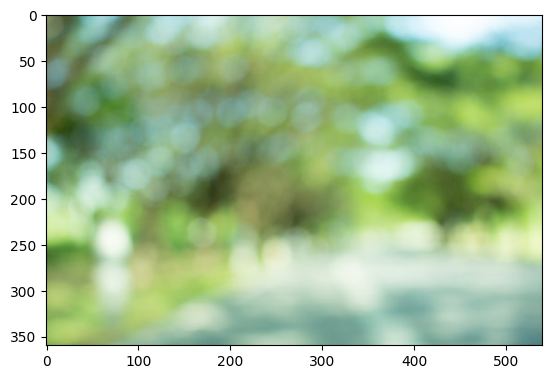

In [59]:
img = cv2.imread("../data/input/hg.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

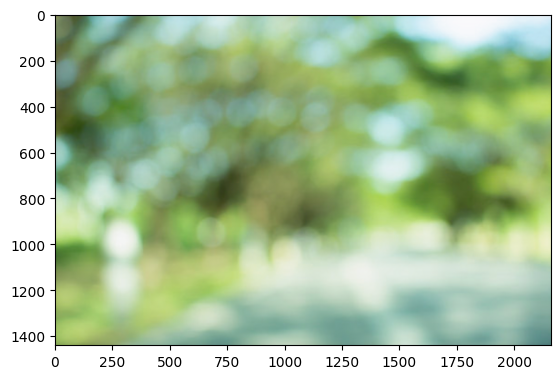

In [60]:
plt.imshow(sr)

In [42]:
model.layers[0]._batch_input_shape = (None, None, None, 3)

In [43]:
# rebuild model architecture by exporting and importing via json
new_model = keras.models.model_from_json(model.to_json())
new_model.summary()

# copy weights from old model to new one
for layer in new_model.layers:
    try:
        layer.set_weights(model.get_layer(name=layer.name).get_weights())
    except:
        print("Could not transfer weights for layer {}".format(layer.name))

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_9 (Conv2D)              (None, None, None,   896         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_7 (BatchNo  (None, None, None,   128        ['conv2d_9[0][0]']               
 rmalization)                   32)                                                         

In [38]:
model.layers[0].input_shape

ListWrapper([(None, None, None, 3)])